In [29]:
import numpy as np
from scipy.optimize import newton

In [30]:
def f1(x):
    return x**3 - 5*x
x0_a = 1
def f2(x):
    return x**3 - 3*x + 1
x0_b = 1
def f3(x):
    return 2 - x**5
x0_c = 0.01
def f4(x):
    return x**4 - 4.29*x**2 - 5.29
x0_d = 0.8

In [31]:
print("a) f(x) = x^3 − 5x, x0 = 1")
print(newton(f1, 1))
print("b) f(x) = x^3 − 3x + 1, x0 = 1")
print(newton(f2, 1))
print("c) f(x) = 2 − x^5 , x0 = 0.01")
print(newton(f3, 0.01))
print("d) f(x) = x^4 − 4.29x^2 − 5.29, x0 = 0.8")
print(newton(f4, 0.8))


a) f(x) = x^3 − 5x, x0 = 1
4.744493466790075e-24
b) f(x) = x^3 − 3x + 1, x0 = 1
1.0000007188230098
c) f(x) = 2 − x^5 , x0 = 0.01
0.01
d) f(x) = x^4 − 4.29x^2 − 5.29, x0 = 0.8
-0.7870232540616441


In [32]:
#2
import sympy as sp
import matplotlib.pyplot as plt

In [33]:
def f(x):
    return x**2 - 3*x + 2

def g1(x):
    return (x**2 + 2)/3

def g2(x):
    return np.sqrt(3*x - 2)

def g3(x):
    return 3 - 2/x

def g4(x):
    if(x == 3/2):
        return 1000000
    return (x**2 - 2)/(2*x - 3)

def g1_prime(x):
    return 2*x/3

def g2_prime(x):
    return 3/(2*np.sqrt(3*x - 2))

def g3_prime(x):
    return 2/(x**2)

def g4_prime(x):
    return (2*x*(2*x-3) - (x**2 - 2)*2)/(2*x - 3)**2

derivetives_in_2 = {"g1'":g1_prime(2),"g2'":g2_prime(2),"g3'":g3_prime(2),"g4'":g4_prime(2)}


In [34]:
def abs_error(x, x_star):
    return abs(x-x_star)

def iterator(g,x0,n):
    x = x0
    errors = []
    for i in range(n):
        x = g(x)
        errors.append(abs_error(x,2))
    return errors

def iteration_scheme(gs,n):
    x0=1.5
    errors = {}
    for key in gs:
        errors[key] = iterator(gs[key],x0,n)
    return errors
        
def convergence_order(errors):
    orders = {}
    for key in errors:
        error = errors[key]
        order = []
        for i in range(1,len(error)-1):
            order.append(np.log(error[i-1]/error[i])/np.log(error[i]/error[i+1]))
        orders[key] = order
    return orders


{'g1': [1.2262832749680934, 1.2698225667382426, 1.3133468725302284, 1.354103262840139, 1.3898444655232702, 1.4193276037066644, 1.442388611038793, 1.4596596285761256], 'g2': [0.9162238068399859, 0.9340947044441619, 0.9487259400893492, 0.9604546041991999, 0.9697050870270836, 0.9769112370433278, 0.9824724031593126, 0.9867337774366354], 'g3': [0.8690663709614039, 0.9242091930861095, 0.9588335764528771, 0.9784836589183455, 0.9889916116911174, 0.9944309468554154, 0.9971989577351807, 0.9985953114817288], 'g4': [0.9999992786518974, 0.9999985573047937, 0.999997114613585, 0.9999942292431593, 0.9999884585502765, 0.9999769173563822, 0.9999538357360596, 0.9999076755651445]}


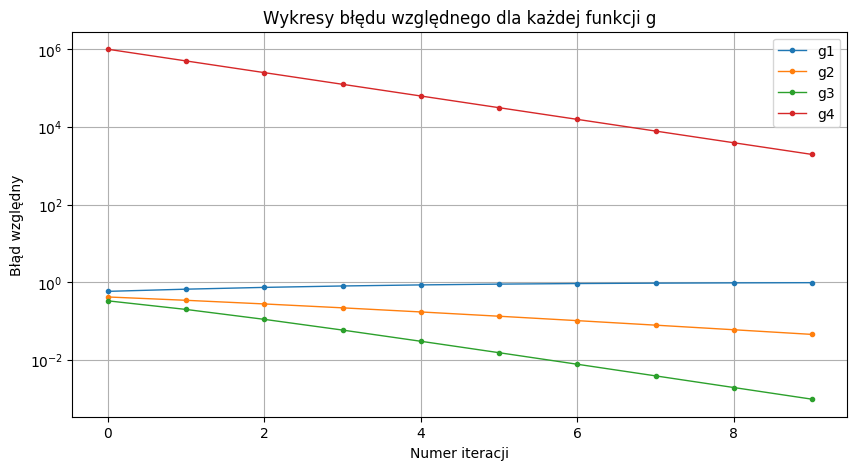

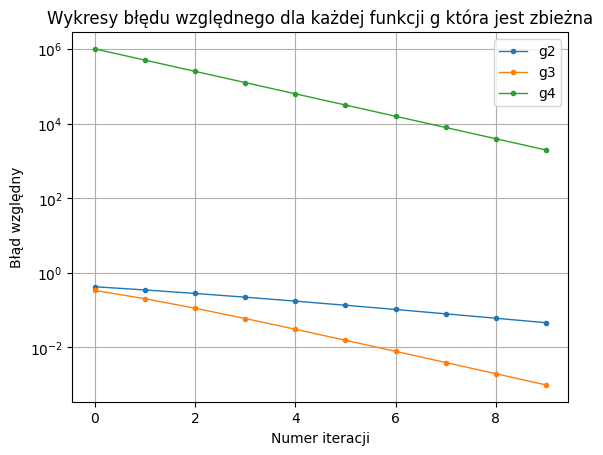

None


In [35]:
def main():
    iterations=10
    gs={'g1':g1,'g2':g2,'g3':g3,'g4':g4}
    errors = iteration_scheme(gs,iterations)
    orders = convergence_order(errors)
    print(orders)
    plt.figure(figsize=(10, 5))
    for key in errors:
        plt.semilogy(errors[key], label=key, marker='o', linestyle='-', linewidth=1, markersize=3)
    plt.title('Wykresy błędu względnego dla każdej funkcji g')
    plt.xlabel('Numer iteracji')
    plt.ylabel('Błąd względny')
    plt.legend()
    plt.grid(True)
    plt.show()
    proper_errors = errors.copy()
    for key in orders:
        if(orders[key][-1] > 1):
            proper_errors.pop(key)
    for key in proper_errors:
        plt.semilogy(proper_errors[key], label=key, marker='o', linestyle='-', linewidth=1, markersize=3)
    plt.title('Wykresy błędu względnego dla każdej funkcji g która jest zbieżna')
    plt.xlabel('Numer iteracji')
    plt.ylabel('Błąd względny')
    plt.legend()
    plt.grid(True)
    plt.show()


main()

In [36]:
#3
def f_a(x):
    return x**3 - 2*x - 5
x0_a = 1
def f_b(x):
    return np.exp(-x) - x
x0_b = 1
def f_c(x):
    return x*np.sin(x) - 1
x0_c = 1

def f_a_prime(x):
    return 3*x**2 - 2
def f_b_prime(x):
    return -np.exp(-x) - 1
def f_c_prime(x):
    return np.sin(x) + x*np.cos(x)

In [37]:
def newton_iterations(f, f_prime, x0, n,focus):
    x = x0
    iterations = 0
    for i in range(n):
        x = x - f(x)/f_prime(x)
        iterations += 1
        if(abs(f(x)) < 2**(-focus)):
            break
    return x, iterations


In [38]:
def main():
    tolerance24 = 2**(-24)
    tolerance53 = 2**(-53)
    x0=1.0
    results24 = {}
    results53 = {}
    iterations24 = {}
    iterations53 = {}
    functions = {"a":(f_a, f_a_prime, x0_a), "b":(f_b, f_b_prime, x0_b), "c":(f_c, f_c_prime, x0_c)}
    for key in functions:
        results24[key], iterations24[key] = newton_iterations(functions[key][0], functions[key][1], functions[key][2], 100, 24)
        results53[key], iterations53[key] = newton_iterations(functions[key][0], functions[key][1], functions[key][2], 100, 53)
    print("24-bit accuracy:")
    for key in results24:
        print(f"Function {key}: {results24[key]} after {iterations24[key]} iterations")
    print("53-bit accuracy:")
    for key in results53:
        print(f"Function {key}: {results53[key]} after {iterations53[key]} iterations")


main()

24-bit accuracy:
Function a: 2.0945514815642077 after 8 iterations
Function b: 0.567143285989123 after 3 iterations
Function c: 1.1141571268362673 after 2 iterations
53-bit accuracy:
Function a: 2.0945514815423265 after 100 iterations
Function b: 0.5671432904097838 after 4 iterations
Function c: 1.1141571408719302 after 100 iterations


In [39]:
#4
def f1(x1,x2):
    return x1**2 + x2**2 - 1

def f2(x1,x2):
    return x1**2 - x2

In [40]:
def newton_method(f1,f2,x1,x2,n,focus):
    x = np.array([x1,x2],dtype=float)
    for i in range(n):
        f = np.array([f1(x[0],x[1]),f2(x[0],x[1])])
        jacobian = np.array([[2*x[0],2*x[1]],[2*x[1],-1]])
        delta_x = np.linalg.solve(jacobian,-f)
        x+=delta_x  
        if np.linalg.norm(delta_x) < focus:
            return x,i
    raise("No convergence")

def relative_error(x,true_x):
    return abs(x - true_x)/abs(true_x)


In [41]:
def main():
    x1 = np.sqrt(np.sqrt(5)/2 - 1/2)
    x2 = np.sqrt(5)/2 - 1/2
    focus = 10**(-6)
    max_iterations = 100
    x,iterations = newton_method(f1,f2,1.0,1.0,max_iterations,focus)    
    errors = [relative_error(x1,x[0]),relative_error(x2,x[1])]
    print("Newton method result: ", x)
    print("True Values: ",x1, x2)
    print("Iterations:", iterations)
    print("x1 Relative Error:", errors[0])
    print("x2 Relative Error:", errors[1])

main()

Newton method result:  [0.78615136 0.61803402]
True Values:  0.7861513777574233 0.6180339887498949
Iterations: 7
x1 Relative Error: 2.8590465023128568e-08
x2 Relative Error: 4.6260462873101796e-08
